# Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [3]:
from sklearn.pipeline import Pipeline

# Load

In [4]:
df_original = pd.read_csv("HW3_movie_metadata.csv")
df = df_original.copy()

In [5]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


In [6]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,"4,993.00","5,028.00","4,939.00","5,020.00","5,036.00","4,159.00","5,043.00","5,043.00","5,030.00","5,022.00","4,551.00","4,935.00","5,030.00","5,043.00","4,714.00","5,043.00"
mean,140.19,107.20,686.51,645.01,"6,560.05","48,468,407.53","83,668.16","9,699.06",1.37,272.77,"39,752,620.44","2,002.47","1,651.75",6.44,2.22,"7,525.96"
std,121.60,25.20,"2,813.33","1,665.04","15,020.76","68,452,990.44","138,485.26","18,163.80",2.01,377.98,"206,114,898.45",12.47,"4,042.44",1.13,1.39,"19,320.45"
min,1.00,7.00,0.00,0.00,0.00,162.00,5.00,0.00,0.00,1.00,218.00,"1,916.00",0.00,1.60,1.18,0.00
25%,50.00,93.00,7.00,133.00,614.00,"5,340,987.50","8,593.50","1,411.00",0.00,65.00,"6,000,000.00","1,999.00",281.00,5.80,1.85,0.00
50%,110.00,103.00,49.00,371.50,988.00,"25,517,500.00","34,359.00","3,090.00",1.00,156.00,"20,000,000.00","2,005.00",595.00,6.60,2.35,166.00
75%,195.00,118.00,194.50,636.00,"11,000.00","62,309,437.50","96,309.00","13,756.50",2.00,326.00,"45,000,000.00","2,011.00",918.00,7.20,2.35,"3,000.00"
max,813.00,511.00,"23,000.00","23,000.00","640,000.00","760,505,847.00","1,689,764.00","656,730.00",43.00,"5,060.00","12,215,500,000.00","2,016.00","137,000.00",9.50,16.00,"349,000.00"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [8]:
df.value_counts()

director_name     num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_2_name         actor_1_facebook_likes  gross          genres                                actor_1_name         movie_title          num_voted_users  cast_total_facebook_likes  actor_3_name     facenumber_in_poster  plot_keywords                                                      movie_imdb_link                                       num_user_for_reviews  language  country      content_rating  budget         title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
Frank Oz          168.00                  87.00     0.00                     548.00                  Ewen Bremner         22,000.00               8,579,684.00   Comedy                                Peter Dinklage       Death at a Funeral   89547            24324                      Kris Marshall    0.00                  end credits roll call|four word title|funeral|secret|uncle         http:

In [9]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

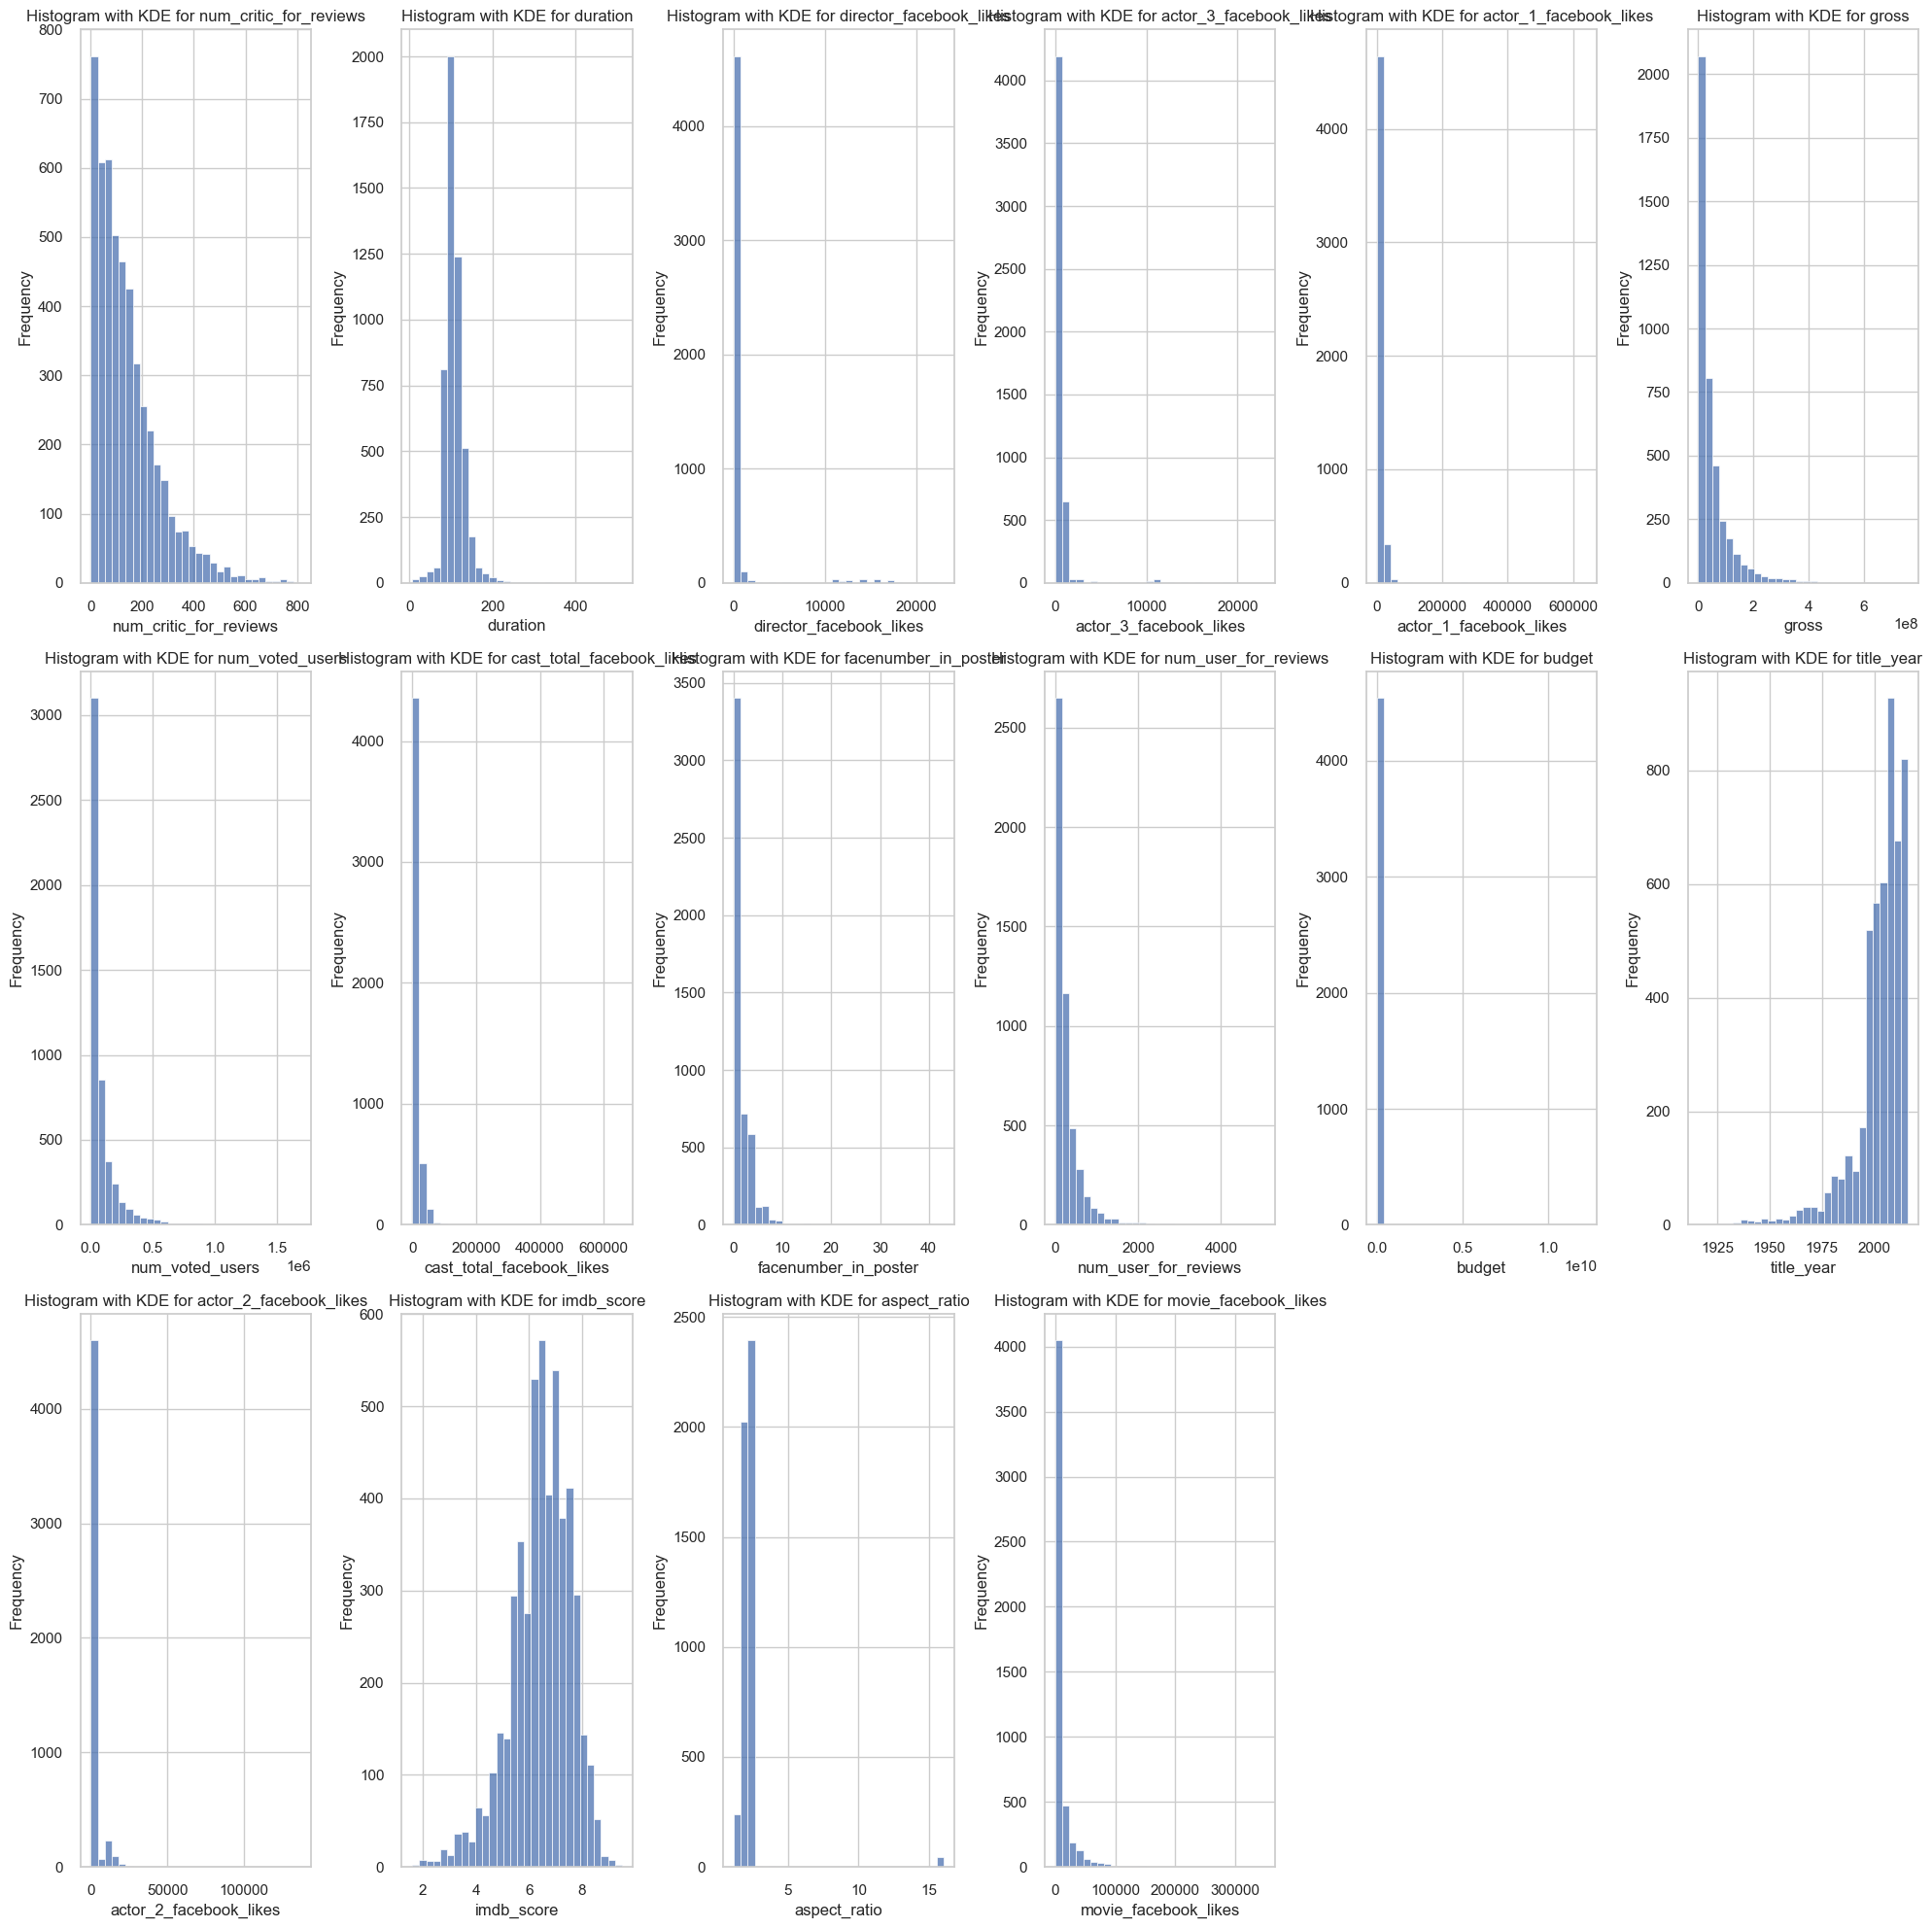

In [10]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Get the number of numerical columns and decide the number of columns in the grid
num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)

# Set the number of columns in the grid (you can adjust this based on your preference)
num_cols_in_grid = 6

# Calculate the number of rows needed
num_rows = (num_plots + num_cols_in_grid - 1) // num_cols_in_grid

# Increase the height of each subplot by adjusting the figsize parameter
fig, axes = plt.subplots(num_rows, num_cols_in_grid, figsize=(20, 20))  # Adjust the figure size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and plot histogram with KDE on a separate subplot
for i, column in enumerate(num_cols):
    sns.histplot(df[column], kde=False, bins=30, ax=axes[i])  # Adjust bins as needed
    axes[i].set_title(f'Histogram with KDE for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots if the number of plots is not a multiple of num_cols_in_grid
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

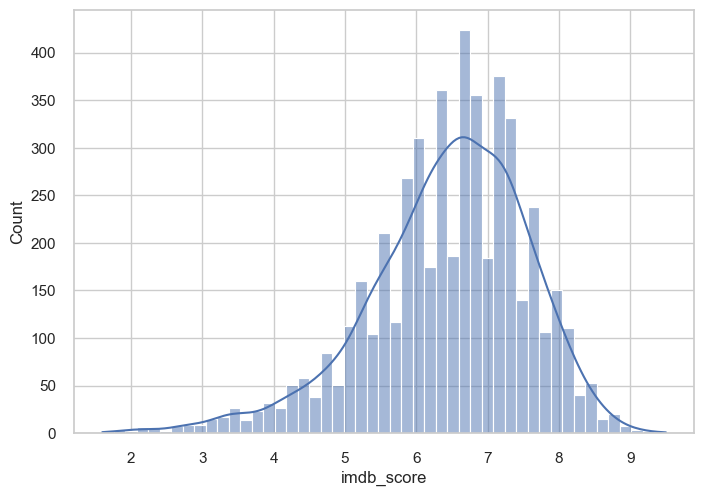

In [11]:
# Distribution of the data
sns.histplot(df["imdb_score"], kde=True)

# Preprocessing

Cut the middle part of the data to avoid the ambiguity between low and high and use median as the boundary

Choose to cut percentile 40-60

In [12]:
median = df.imdb_score.median()
print("median =", median)

median = 6.6


In [13]:
# Calculate the 40th and 60th percentiles of the 'imdb_score' column
percentile_40 = df['imdb_score'].quantile(0.45)
percentile_60 = df['imdb_score'].quantile(0.55)

# Create a mask to select rows outside the 40-60 percentile range
mask = (df['imdb_score'] < percentile_40) | (df['imdb_score'] > percentile_60)

# Use the mask to drop the selected rows
df_cut = df[mask]

df_cut

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,Anthony Vallone,NaN,84.00,2.00,2.00,John Considine,45.00,NaN,Crime|Drama,Richard Jewell,...,1.00,English,USA,PG-13,"3,250.00","2,005.00",44.00,7.80,NaN,4
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,6.00,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84
5039,NaN,43.00,43.00,NaN,319.00,Valorie Curry,841.00,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.00,English,USA,TV-14,NaN,NaN,593.00,7.50,16.00,32000
5040,Benjamin Roberds,13.00,76.00,0.00,0.00,Maxwell Moody,0.00,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.00,English,USA,NaN,"1,400.00","2,013.00",0.00,6.30,NaN,16


Add new binary column call "label" with 1 = high score, 0 = low score

In [14]:
df_cut['imdb_score_high_low'] = np.where(df_cut['imdb_score'] < median, 0.0, 1.0)
df_cut

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_score_high_low
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,1.00
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0,1.00
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000,1.00
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000,1.00
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,Anthony Vallone,NaN,84.00,2.00,2.00,John Considine,45.00,NaN,Crime|Drama,Richard Jewell,...,English,USA,PG-13,"3,250.00","2,005.00",44.00,7.80,NaN,4,1.00
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84,1.00
5039,NaN,43.00,43.00,NaN,319.00,Valorie Curry,841.00,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,English,USA,TV-14,NaN,NaN,593.00,7.50,16.00,32000,1.00
5040,Benjamin Roberds,13.00,76.00,0.00,0.00,Maxwell Moody,0.00,NaN,Drama|Horror|Thriller,Eva Boehnke,...,English,USA,NaN,"1,400.00","2,013.00",0.00,6.30,NaN,16,0.00


In [15]:
df_cut[["imdb_score_high_low", "imdb_score"]]

,imdb_score_high_low,imdb_score
0,1.00,7.90
1,1.00,7.10
2,1.00,6.80
3,1.00,8.50
4,1.00,7.10
...,...,...
5036,1.00,7.80
5038,1.00,7.70
5039,1.00,7.50
5040,0.00,6.30


<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

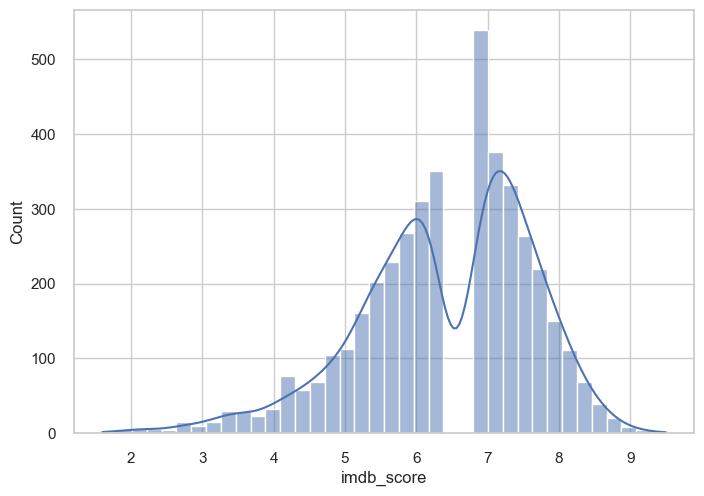

In [16]:
sns.histplot(df_cut["imdb_score"], kde=True)

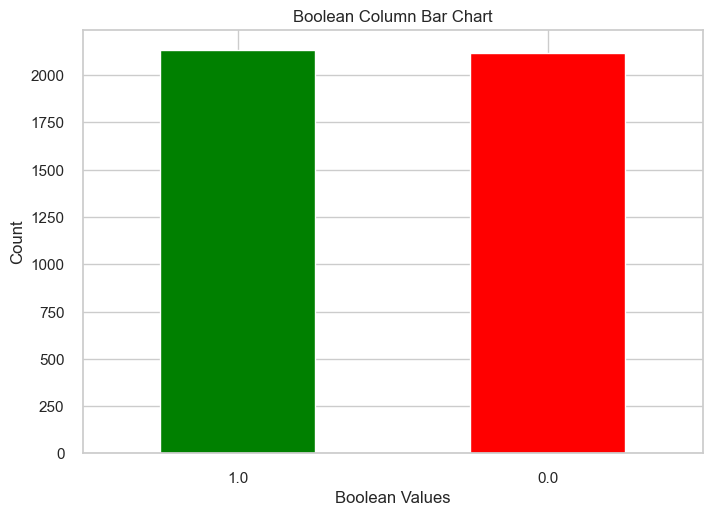

In [17]:
# Count the occurrences of each boolean value in the 'BooleanColumn'
counts = df_cut['imdb_score_high_low'].value_counts()

# Plot a bar chart
counts.plot(kind='bar', color=['green', 'red'], rot=0)

# Add labels and title
plt.xlabel('Boolean Values')
plt.ylabel('Count')
plt.title('Boolean Column Bar Chart')

# Show the plot
plt.show()

Drop the categorical columns

In [18]:
# Get the list of categorical columns
cat_cols = df_cut.select_dtypes(include='object').columns

# Drop the categorical columns
df4 = df_cut.drop(columns=cat_cols)

Encode the int columns as float

In [19]:
df4['num_voted_users'] = df4['num_voted_users'].astype('float64')

In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 0 to 5041
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4200 non-null   float64
 1   duration                   4235 non-null   float64
 2   director_facebook_likes    4152 non-null   float64
 3   actor_3_facebook_likes     4228 non-null   float64
 4   actor_1_facebook_likes     4242 non-null   float64
 5   gross                      3454 non-null   float64
 6   num_voted_users            4248 non-null   float64
 7   cast_total_facebook_likes  4248 non-null   int64  
 8   facenumber_in_poster       4235 non-null   float64
 9   num_user_for_reviews       4228 non-null   float64
 10  budget                     3817 non-null   float64
 11  title_year                 4148 non-null   float64
 12  actor_2_facebook_likes     4236 non-null   float64
 13  imdb_score                 4248 non-null   float

Drop NaN

In [21]:
df4.isna().sum()

num_critic_for_reviews        48
duration                      13
director_facebook_likes       96
actor_3_facebook_likes        20
actor_1_facebook_likes         6
gross                        794
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          20
budget                       431
title_year                   100
actor_2_facebook_likes        12
imdb_score                     0
aspect_ratio                 288
movie_facebook_likes           0
imdb_score_high_low            0
dtype: int64

Fill in gross, budget using their median (columns where filling is appropriate)

In [22]:
df4["gross"] = df4["gross"].fillna(df4["gross"].median())
df4["budget"] = df4["budget"].fillna(df4["budget"].median())
df4["aspect_ratio"] = df4["aspect_ratio"].fillna(df4["aspect_ratio"].median())
df4.isna().sum()

num_critic_for_reviews        48
duration                      13
director_facebook_likes       96
actor_3_facebook_likes        20
actor_1_facebook_likes         6
gross                          0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          20
budget                         0
title_year                   100
actor_2_facebook_likes        12
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
imdb_score_high_low            0
dtype: int64

In [23]:
df5 = df4.dropna()
df5.isna().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
imdb_score_high_low          0
dtype: int64

In [24]:
print("Dataframe's entries =", len(df4), "rows")
print("Dataframe's entries after dropping NaN =", len(df5), "rows")
print("Dropped entries =", len(df4)-len(df5), "rows =>", round((len(df4)-len(df5))/len(df4)*100,2), "%")

Dataframe's entries = 4248 rows
Dataframe's entries after dropping NaN = 4075 rows
Dropped entries = 173 rows => 4.07 %


Scale the feature

In [25]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,"4,075.00",142.63,123.69,1.00,52.00,111.00,196.00,813.00
duration,"4,075.00",108.21,22.82,14.00,94.00,104.00,118.00,330.00
director_facebook_likes,"4,075.00",706.02,"2,865.15",0.00,7.00,49.00,208.00,"22,000.00"
actor_3_facebook_likes,"4,075.00",646.05,"1,685.93",0.00,131.50,372.00,633.00,"23,000.00"
actor_1_facebook_likes,"4,075.00","6,523.56","15,742.48",0.00,617.00,988.00,"11,000.00","640,000.00"
gross,"4,075.00","44,693,097.21","64,561,635.30",162.00,"8,447,795.50","24,725,199.50","51,638,303.00","760,505,847.00"
num_voted_users,"4,075.00","88,999.56","148,685.30",5.00,"9,295.00","34,620.00","100,657.00","1,689,764.00"
cast_total_facebook_likes,"4,075.00","9,668.64","18,815.57",0.00,"1,439.00","3,085.00","13,633.50","656,730.00"
facenumber_in_poster,"4,075.00",1.34,2.02,0.00,0.00,1.00,2.00,43.00
num_user_for_reviews,"4,075.00",284.42,388.67,1.00,68.00,162.00,340.00,"5,060.00"


In [26]:
column_list = df5.columns.to_list()
column_list.remove("imdb_score_high_low")

In [27]:
scaler = StandardScaler()
columns_to_scale = [col for col in df5.columns if col != 'imdb_score_high_low']
df_scaled = df5.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns=df5.columns).add_prefix('scaled_')

df_scaled = df_scaled.reset_index(drop=True)

df_scaled

,scaled_num_critic_for_reviews,scaled_duration,scaled_director_facebook_likes,scaled_actor_3_facebook_likes,scaled_actor_1_facebook_likes,scaled_gross,scaled_num_voted_users,scaled_cast_total_facebook_likes,scaled_facenumber_in_poster,scaled_num_user_for_reviews,scaled_budget,scaled_title_year,scaled_actor_2_facebook_likes,scaled_imdb_score,scaled_aspect_ratio,scaled_movie_facebook_likes,scaled_imdb_score_high_low
0,4.69,3.06,-0.25,0.12,-0.35,11.09,5.36,-0.26,-0.66,7.13,0.91,0.54,-0.17,1.25,-0.51,1.23,1.00
1,1.29,2.66,-0.05,0.21,2.13,4.10,2.57,2.06,-0.66,2.45,1.21,0.38,0.82,0.59,0.33,-0.39,1.00
2,3.71,1.74,-0.25,-0.29,0.28,2.41,1.26,0.11,-0.17,1.83,0.95,1.00,-0.30,0.34,0.33,3.80,1.00
3,5.42,2.44,7.43,13.26,1.30,6.25,7.10,5.16,-0.66,6.22,0.97,0.77,5.21,1.75,0.33,7.69,1.00
4,2.02,2.09,-0.25,1.99,1.11,4.52,1.98,1.93,-0.66,4.16,1.01,0.38,2.28,-0.16,0.33,-0.39,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,-0.87,-1.24,-0.25,-0.38,-0.41,-0.69,-0.59,-0.51,-0.66,-0.64,-0.18,0.22,-0.40,-0.08,0.33,-0.39,0.00
4071,-0.70,-1.19,-0.25,-0.38,-0.41,-0.66,-0.25,-0.51,-0.66,-0.40,-0.18,-0.79,-0.40,0.42,-1.12,-0.39,1.00
4072,-1.15,-0.93,-0.25,-0.19,-0.37,-0.31,-0.59,-0.39,0.33,-0.72,-0.09,0.85,-0.29,1.08,0.33,-0.39,1.00
4073,-1.05,-1.41,-0.25,-0.38,-0.41,-0.31,-0.60,-0.51,-0.66,-0.72,-0.18,0.85,-0.40,-0.08,0.33,-0.39,0.00


# Model: KMEANS

Model 1: K = 2 (split by most significant difference)

In [28]:
#Create KMean Cluster
km1 =KMeans(n_clusters=2,init='k-means++',random_state=0,verbose=0)

#Train the model using the training sets
km1.fit(df_scaled)

#Predict the response for test dataset
target_pred = km1.predict(df_scaled)

In [29]:
cluster_result=pd.DataFrame(km1.cluster_centers_,columns=df_scaled.columns,index=['cluster_0','cluster_1'])
cluster_result.T

,cluster_0,cluster_1
scaled_num_critic_for_reviews,1.50,-0.26
scaled_duration,0.81,-0.14
scaled_director_facebook_likes,0.65,-0.11
scaled_actor_3_facebook_likes,0.90,-0.16
scaled_actor_1_facebook_likes,0.71,-0.12
scaled_gross,1.33,-0.23
scaled_num_voted_users,1.69,-0.29
scaled_cast_total_facebook_likes,0.93,-0.16
scaled_facenumber_in_poster,0.03,-0.01
scaled_num_user_for_reviews,1.49,-0.26


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

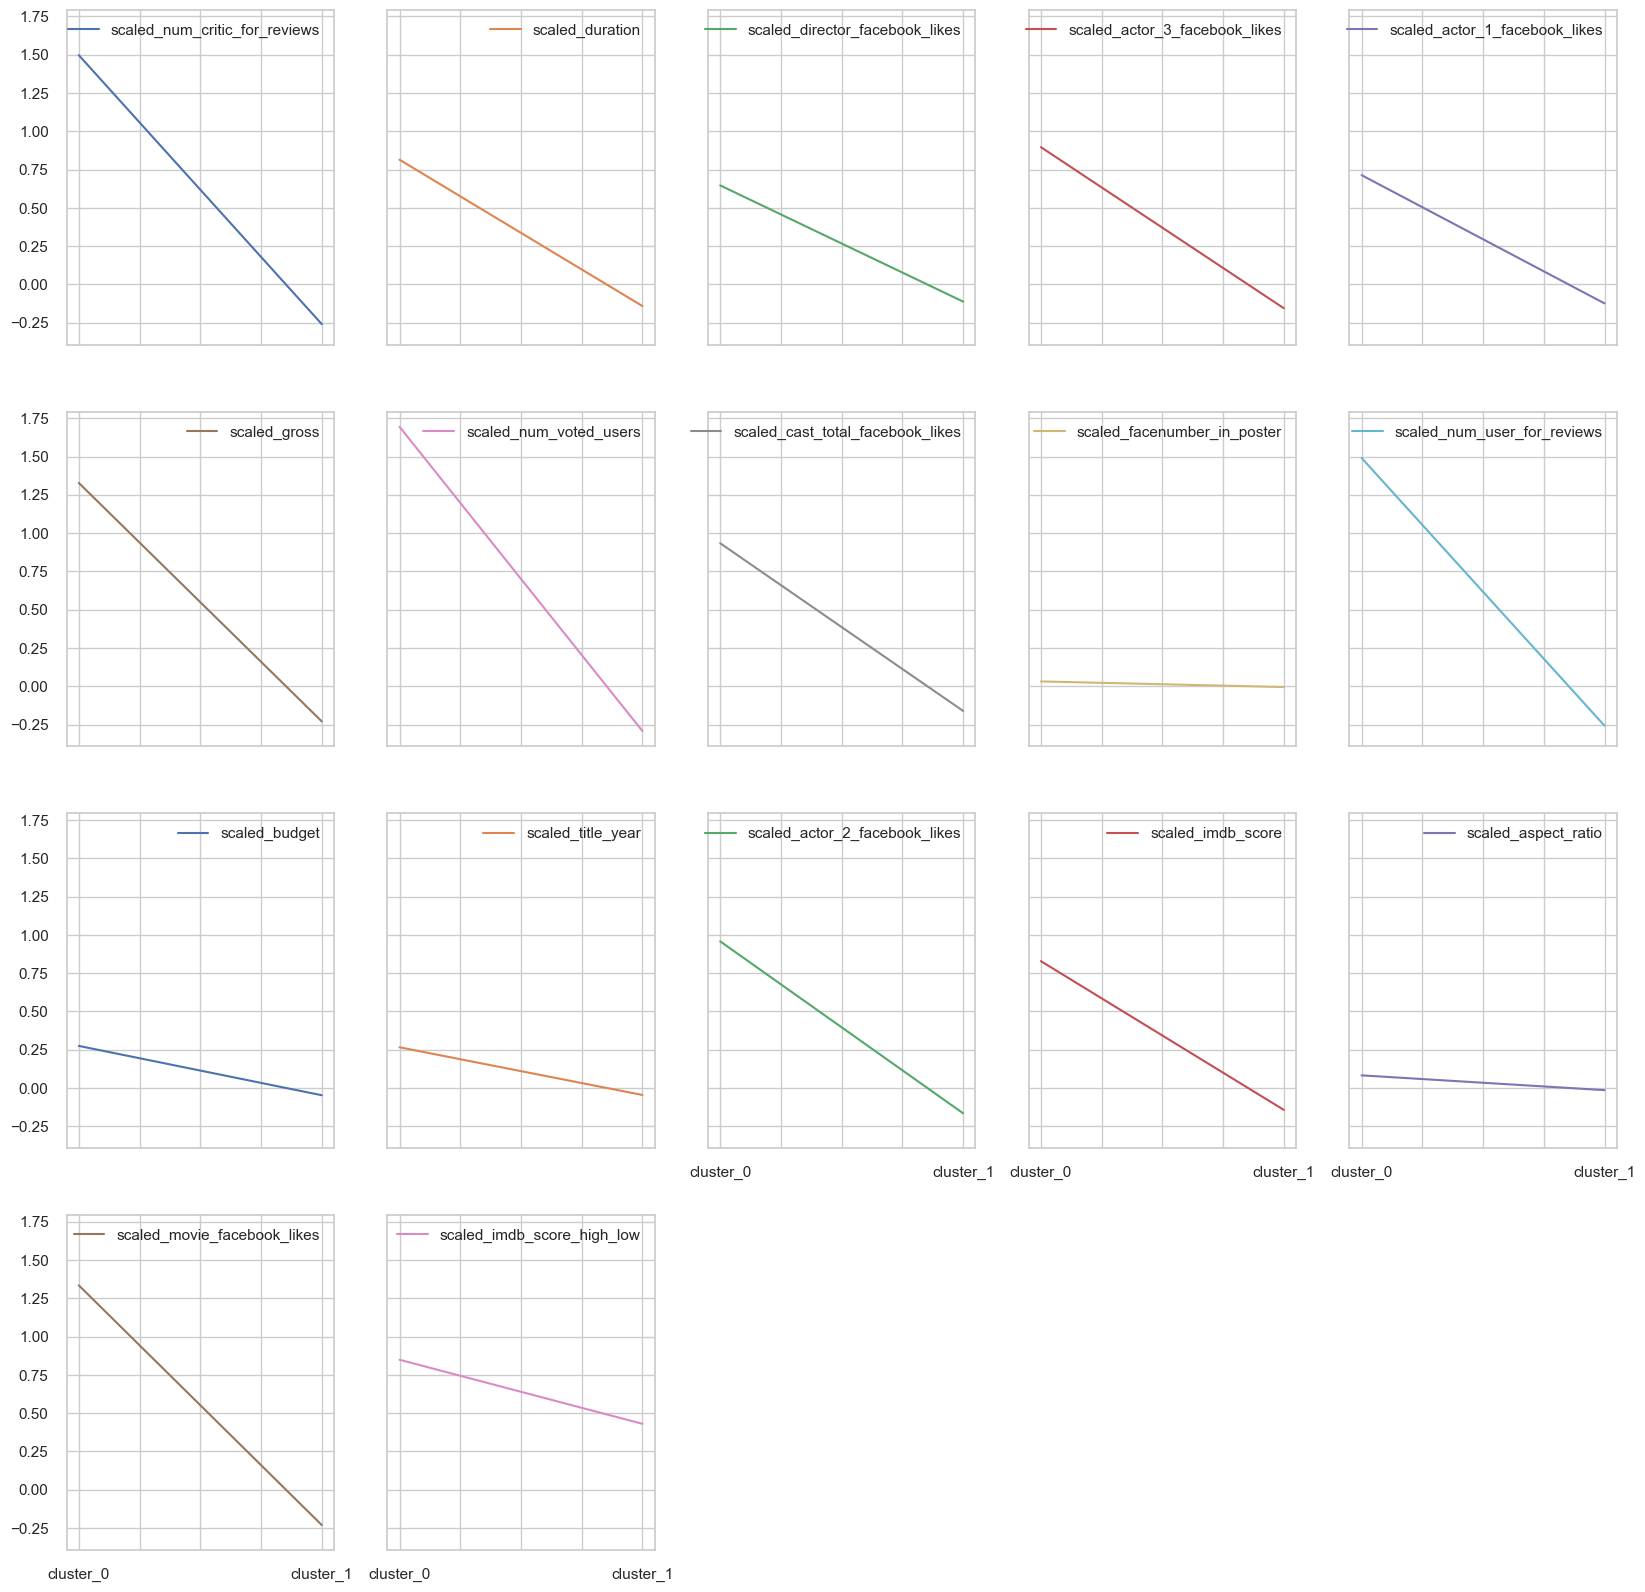

In [30]:
cluster_result.plot(subplots=True,layout=(4,5),sharey=True,figsize=(20,20))

The categories are based on whether or not movies_facebook_likes, and the num_voted columns are high or low

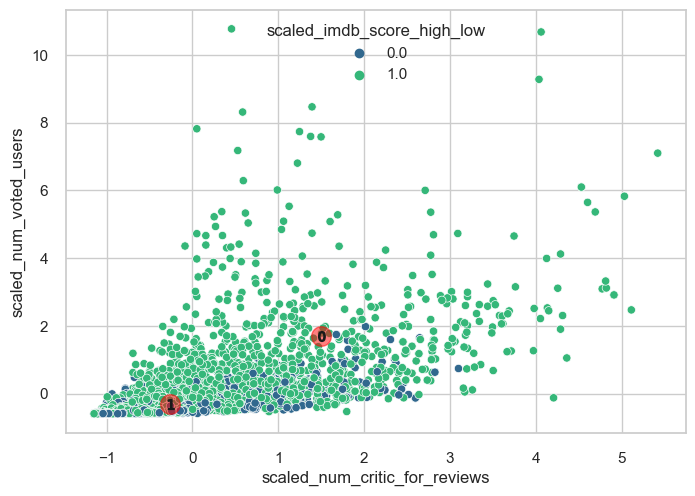

In [106]:
sns.scatterplot(data=df_scaled,x='scaled_num_critic_for_reviews',y='scaled_num_voted_users',hue='scaled_imdb_score_high_low', palette='viridis')
centers = km1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 6], c='red', marker='o',s=200, alpha=0.5)
for i, c in enumerate(centers):
        plt.scatter(c[0], c[6], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

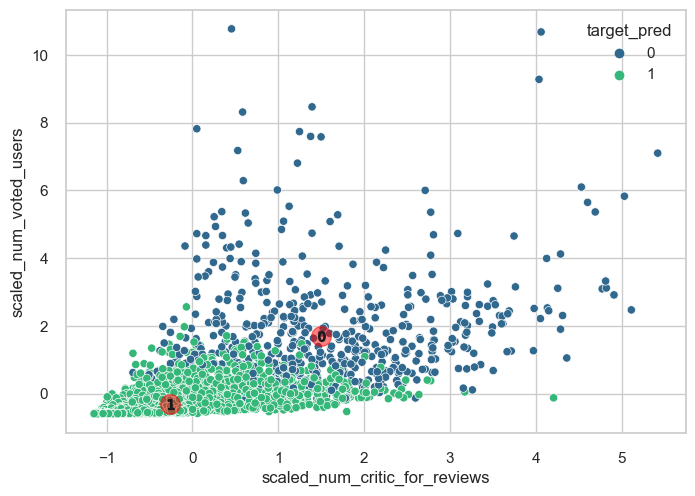

In [107]:
df_scaled["target_pred"] = km1.labels_

sns.scatterplot(data=df_scaled,x='scaled_num_critic_for_reviews',y='scaled_num_voted_users',hue='target_pred', palette='viridis')
centers = km1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 6], c='red', marker='o',s=200, alpha=0.5)
for i, c in enumerate(centers):
        plt.scatter(c[0], c[6], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

df_scaled.drop(columns=["target_pred"],inplace=True)

In [108]:
df_compared = pd.DataFrame({"True_label":[int(i) for i in list(df_scaled.scaled_imdb_score_high_low)],"KM_label":km1.labels_})
df_compared

,True_label,KM_label
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
4070,0,1
4071,1,1
4072,1,1
4073,0,1


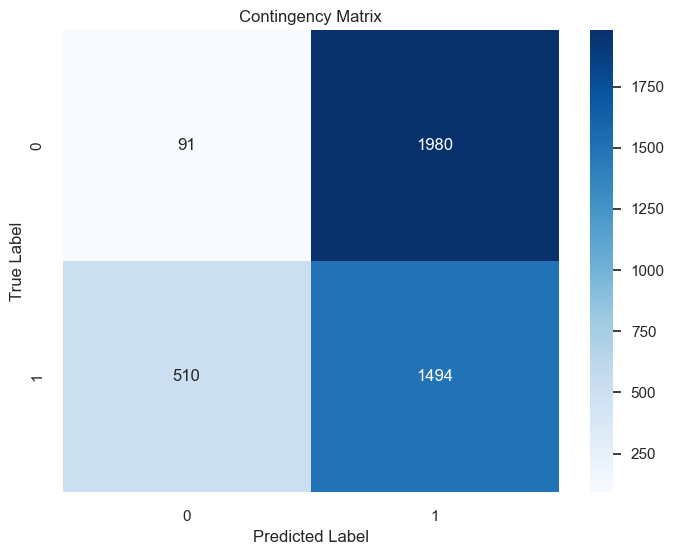

In [109]:
contingency_matrix = metrics.cluster.contingency_matrix(labels_true=df_compared['True_label'],labels_pred=df_compared['KM_label'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Contingency Matrix')
plt.show()

In [145]:
(1980+510)/((1980+510)+(91+1494))*100

61.104294478527606

In [110]:
km1.score(df_scaled)

-54919.28637222192

Model 2: Find K from graphs and use only the good features from before

In [111]:
df_scaled.columns

Index(['scaled_num_critic_for_reviews', 'scaled_duration',
       'scaled_director_facebook_likes', 'scaled_actor_3_facebook_likes',
       'scaled_actor_1_facebook_likes', 'scaled_gross',
       'scaled_num_voted_users', 'scaled_cast_total_facebook_likes',
       'scaled_facenumber_in_poster', 'scaled_num_user_for_reviews',
       'scaled_budget', 'scaled_title_year', 'scaled_actor_2_facebook_likes',
       'scaled_imdb_score', 'scaled_aspect_ratio',
       'scaled_movie_facebook_likes', 'scaled_imdb_score_high_low'],
      dtype='object')

In [126]:
target = df_scaled["scaled_imdb_score_high_low"]
selected = ['scaled_num_critic_for_reviews','scaled_num_voted_users','scaled_num_user_for_reviews','scaled_movie_facebook_likes']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled[selected], target, test_size=0.3,shuffle=True,stratify=target,random_state=100)

In [128]:
Sum_of_squared_distances_train = []
Sum_of_squared_distances_test = []
Silhouette_train=[]
Silhouette_test=[]
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k,init='k-means++',random_state=0)
    km = km.fit(X_train)
    pred_train=km.predict(X_train)
    pred_test=km.predict(X_test)
    Sum_of_squared_distances_train.append(abs(km.score(X_train)))
    Sum_of_squared_distances_test.append(abs(km.score(X_test)))
    Silhouette_train.append(metrics.cluster.silhouette_score(X_train,pred_train,metric='euclidean'))
    Silhouette_test.append(metrics.cluster.silhouette_score(X_test,pred_test,metric='euclidean'))

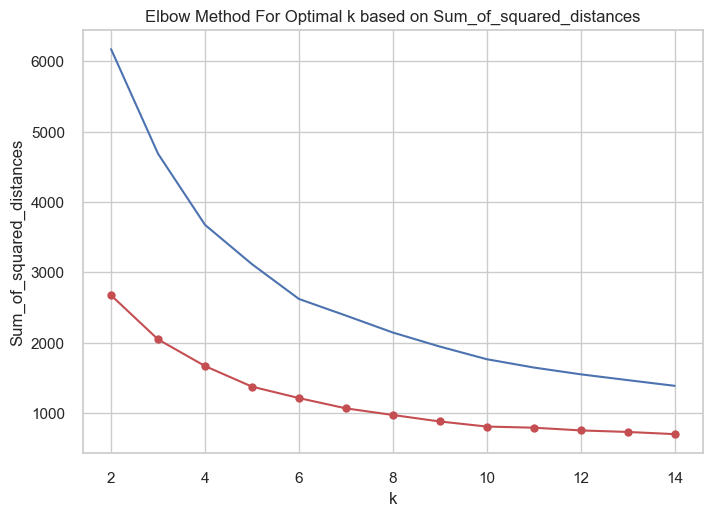

In [129]:
plt.plot(K, Sum_of_squared_distances_train, 'bx-')
plt.plot(K, Sum_of_squared_distances_test, 'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k based on Sum_of_squared_distances')
plt.show()

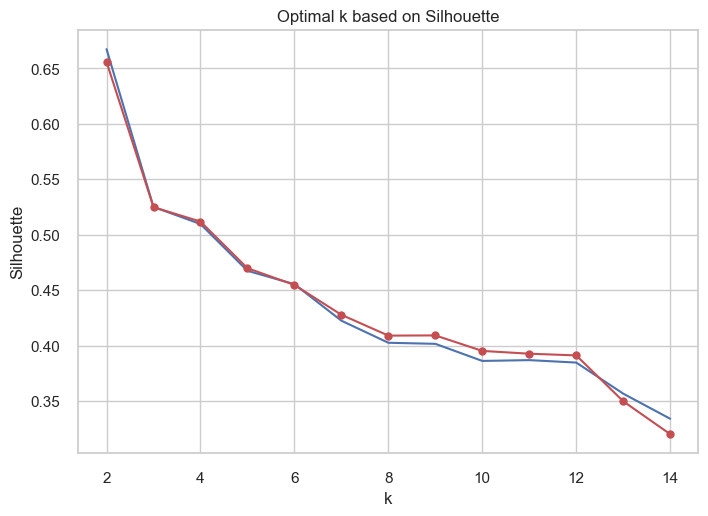

In [130]:
plt.plot(K, Silhouette_train, 'bx-')
plt.plot(K, Silhouette_test, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Optimal k based on Silhouette')
plt.show()

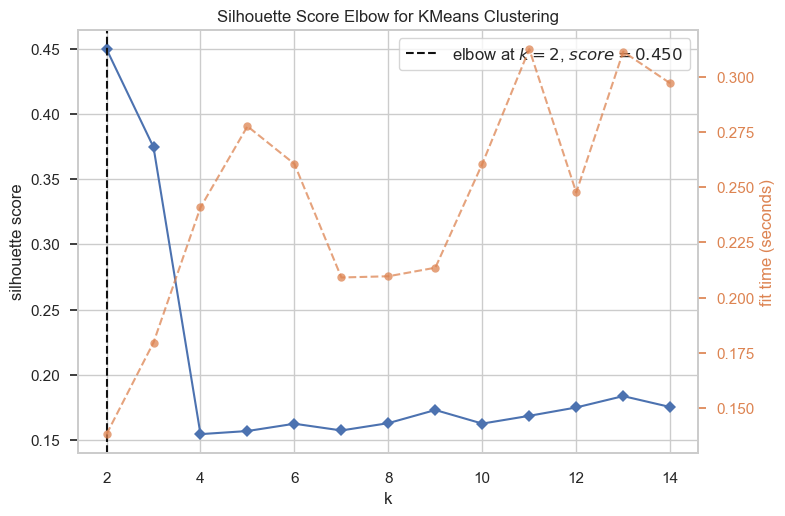

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [131]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(2,15),metric='silhouette')
visualizer.fit(df_scaled)
visualizer.show()

In [132]:
#Create KMean Cluster
km2 =KMeans(n_clusters=2,init='k-means++',random_state=0,verbose=0)

#Train the model using the training sets
km2.fit(df_scaled[selected])

#Predict the response for test dataset
target_pred = km2.predict(df_scaled[selected])

In [133]:
cluster_result=pd.DataFrame(km2.cluster_centers_,columns=selected,index=['cluster_0','cluster_1'])
cluster_result.T

,cluster_0,cluster_1
scaled_num_critic_for_reviews,1.78,-0.28
scaled_num_voted_users,1.80,-0.28
scaled_num_user_for_reviews,1.69,-0.26
scaled_movie_facebook_likes,1.59,-0.25


In [134]:
km2.score(df_scaled[selected])

-8841.561893584147

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

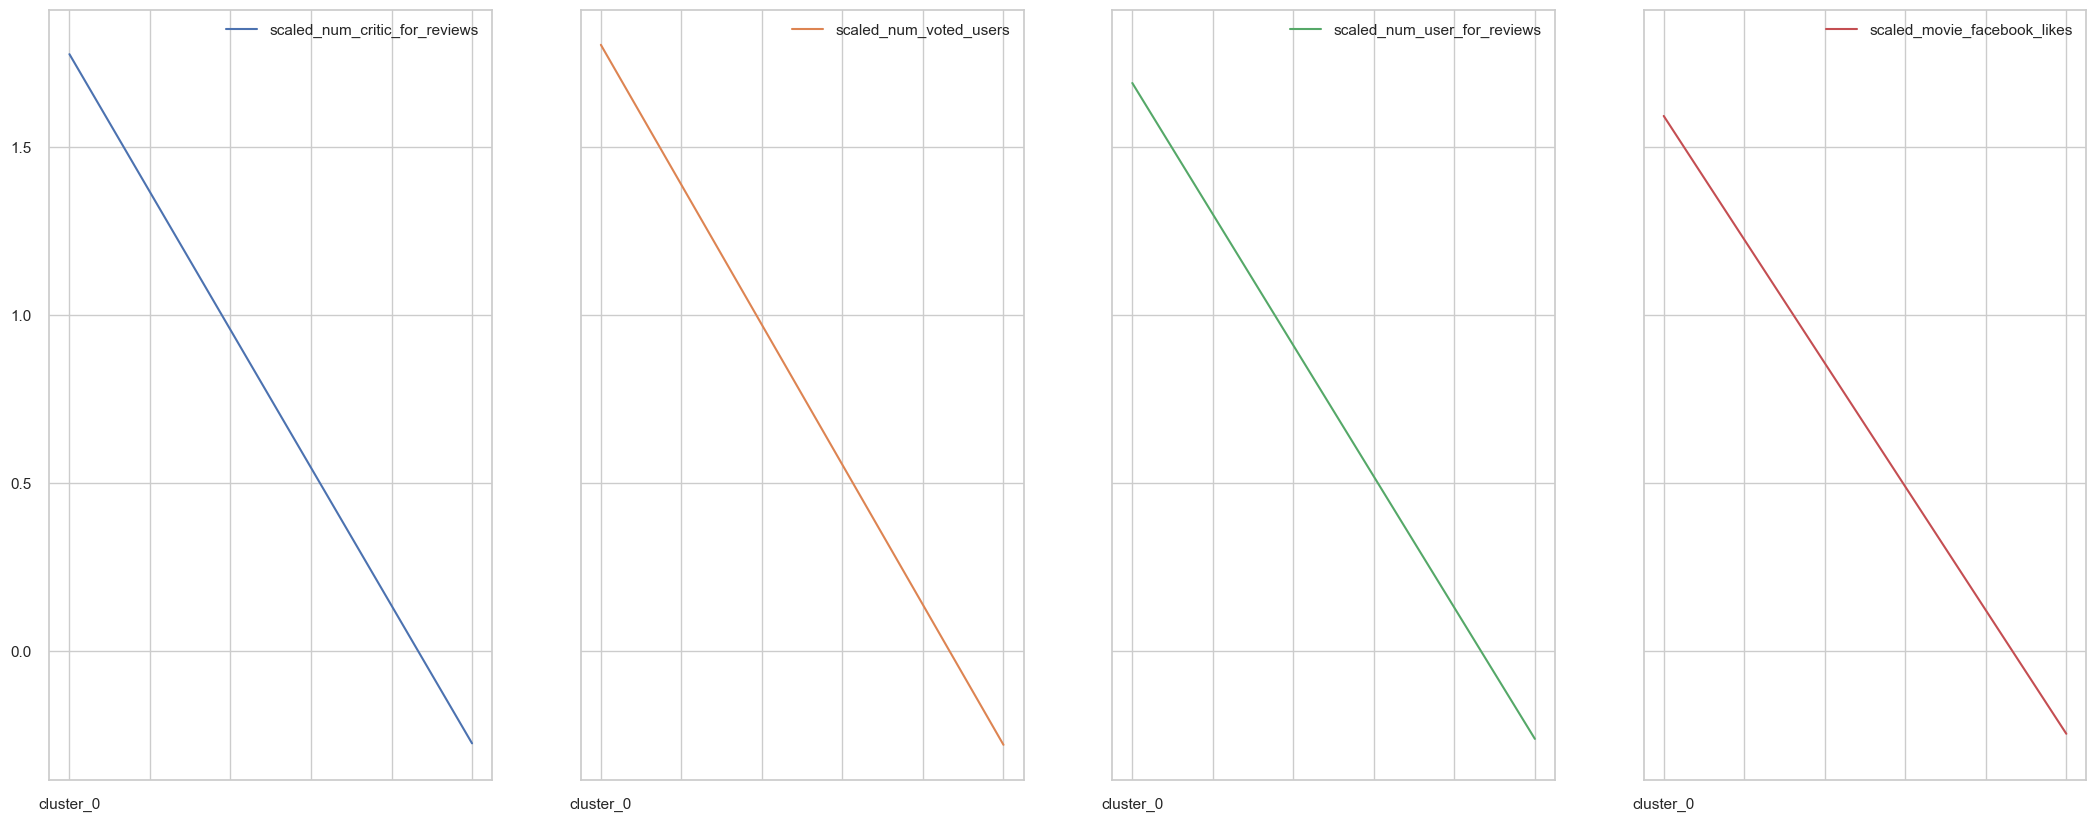

In [141]:
cluster_result.plot(subplots=True,layout=(1,6),sharey=True,figsize=(40,10))

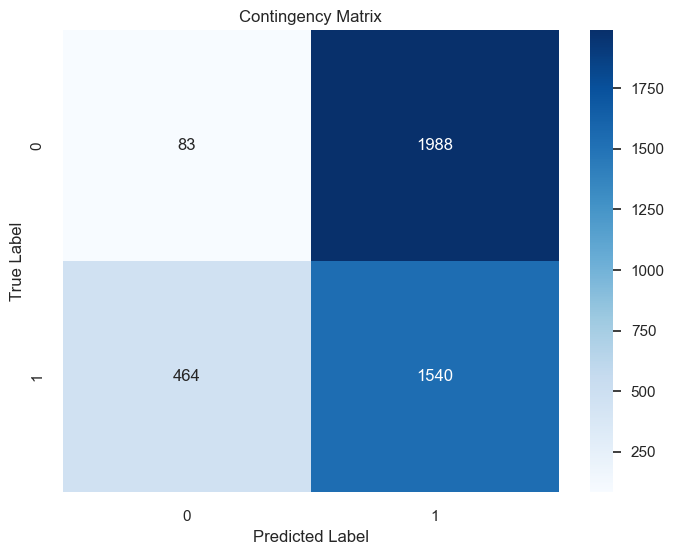

In [136]:
contingency_matrix = metrics.cluster.contingency_matrix(labels_true=df_scaled["scaled_imdb_score_high_low"],labels_pred=km2.labels_)

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Contingency Matrix')
plt.show()

In [144]:
(1988+464)/((1988+464)+(83+1540))*100

60.171779141104295

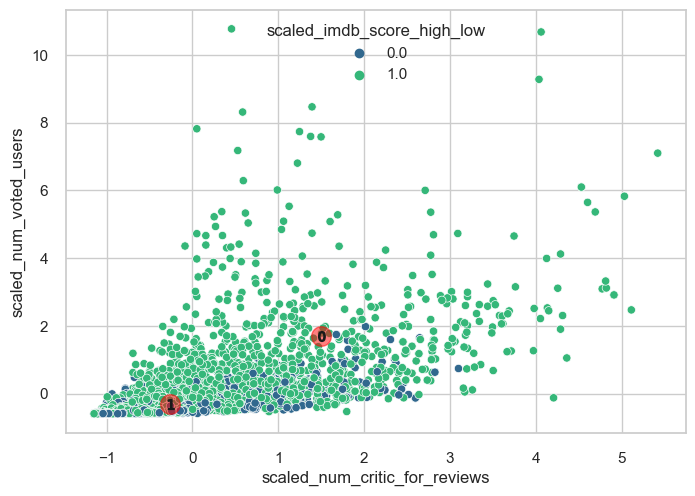

In [137]:
sns.scatterplot(data=df_scaled,x='scaled_num_critic_for_reviews',y='scaled_num_voted_users',hue='scaled_imdb_score_high_low', palette='viridis')
centers = km1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 6], c='red', marker='o',s=200, alpha=0.5)
for i, c in enumerate(centers):
        plt.scatter(c[0], c[6], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

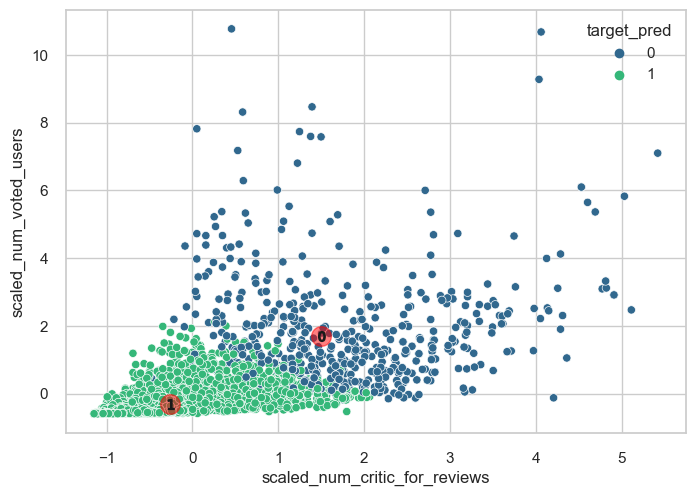

In [138]:
df_scaled["target_pred"] = km2.labels_

sns.scatterplot(data=df_scaled,x='scaled_num_critic_for_reviews',y='scaled_num_voted_users',hue='target_pred', palette='viridis')
centers = km1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 6], c='red', marker='o',s=200, alpha=0.5)
for i, c in enumerate(centers):
        plt.scatter(c[0], c[6], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

df_scaled.drop(columns=["target_pred"],inplace=True)